In [71]:
import re
import csv
import numpy as np
import pandas as pd
import requests
import urllib
from pprint import pprint
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns',500)
sns.set(style='ticks',color_codes=True)
from sklearn import preprocessing

In [72]:
df = pd.read_csv("dataset kaggle bus cleaned 2.csv")
df.shape

/Users/vanditnarula/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(328235, 26)

In [73]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Occurred_On', 'day', 'time',
       'hour of issue', 'datetime_text', 'Created_On', 'Boro',
       'Bus_Company_Name', 'bus company name normalized', 'How_Long_Delayed',
       'Number_Of_Students_On_The_Bus', 'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Informed_On', 'Incident_Number', 'Last_Updated_On',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [74]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,day,time,hour of issue,datetime_text,Created_On,Boro,Bus_Company_Name,bus company name normalized,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1212699,Special Ed AM Run,48186,N758,Other,75485,2015-09-02T06:27:00,2015-09-02,06:27:00,6,2015-09-02 06:27:00,2015-09-02T06:29:00,Nassau County,"BORO TRANSIT, INC.","BORO TRANSIT, INC.",25 minutes,0,Yes,No,No,2015-09-02T06:29:00,NaN,2015-09-02T06:29:16,Running Late,School-Age
1,2015-2016,1212700,Special Ed AM Run,2518,L530,Mechanical Problem,21854,2015-09-02T06:24:00,2015-09-02,06:24:00,6,2015-09-02 06:24:00,2015-09-02T06:30:00,Brooklyn,"RELIANT TRANS, INC. (B232","RELIANT TRANS, INC.",NaN,0,Yes,Yes,Yes,2015-09-02T06:30:00,NaN,2015-09-02T06:30:19,Breakdown,School-Age
2,2015-2016,1212701,Special Ed AM Run,235,K168,Other,18366,2015-09-02T06:45:00,2015-09-02,06:45:00,6,2015-09-02 06:45:00,2015-09-02T06:47:00,Brooklyn,"NEW DAWN TRANSIT, LLC (B2","NEW DAWN TRANSIT, LLC (B2",30MINS,0,Yes,Yes,No,2015-09-02T06:47:00,NaN,2015-09-02T08:05:39,Running Late,School-Age
3,2015-2016,1212703,Special Ed AM Run,2102,K216,Other,21501,2015-09-02T06:55:00,2015-09-02,06:55:00,6,2015-09-02 06:55:00,2015-09-02T07:02:00,Brooklyn,EMPIRE STATE BUS CORP.,EMPIRE STATE BUS CORP.,20 min,1,Yes,Yes,No,2015-09-02T07:02:00,NaN,2015-09-02T07:02:01,Running Late,School-Age
4,2015-2016,1212704,Special Ed AM Run,48162,N861,Mechanical Problem,75485,2015-09-02T06:55:00,2015-09-02,06:55:00,6,2015-09-02 06:55:00,2015-09-02T07:04:00,Nassau County,"BORO TRANSIT, INC.","BORO TRANSIT, INC.",30 min,0,Yes,Yes,No,2015-09-02T07:04:00,NaN,2015-09-02T07:04:25,Running Late,School-Age


In [75]:
df_runlate = df[df['Breakdown_or_Running_Late']=='Running Late']

In [76]:
df.describe()

,Busbreakdown_ID,hour of issue,Number_Of_Students_On_The_Bus
count,3.282350e+05,328235.000000,328235.000000
mean,1.380236e+06,8.229915,3.316267
std,9.737868e+04,3.107067,66.306166
min,1.212681e+06,0.000000,0.000000
25%,1.295976e+06,6.000000,0.000000
50%,1.379091e+06,7.000000,0.000000
75%,1.466678e+06,8.000000,3.000000
max,1.548737e+06,23.000000,9052.000000


In [77]:
df.info()
#Incident_Number and Boro are low on numbers of rows - INCIDEN NUMBER NOT NECCESSARY 
#Convert school to day/time object 
#Look into reason 
#TARGET IS Breakdown_or_running_late

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328235 entries, 0 to 328234
Data columns (total 26 columns):
School_Year                        328235 non-null object
Busbreakdown_ID                    328235 non-null int64
Run_Type                           328232 non-null object
Bus_No                             328225 non-null object
Route_Number                       328228 non-null object
Reason                             328233 non-null object
Schools_Serviced                   328228 non-null object
Occurred_On                        328235 non-null object
day                                328235 non-null object
time                               328235 non-null object
hour of issue                      328235 non-null int64
datetime_text                      328235 non-null object
Created_On                         328235 non-null object
Boro                               317077 non-null object
Bus_Company_Name                   328235 non-null object
bus company name norm

In [78]:
df.Incident_Number.dropna()
#INCIDENT NUMBER NOT SHOWING UP FOR EACH ROW. Not neccessary 
#There is only incident numbers for 9844 out of 328,235 

1102          2710956
1442          2737089
1509          2728990
1987          2725956
2177          2747045
2366          2783571
3254          2787061
3611          2784166
3779          2787899
4094          2710619
4660          2731470
4935          2741136
5935          2715862
6055          2786417
6392          2824627
6505          2830853
6508          2830824
6530          2830846
6536          2830847
6565          2830876
6595          2830881
6600          2830880
6671          2830917
6719          2830933
6732          2830980
6750          2831564
6752          2831557
6756          2831581
6787          2831812
6791          2831814
             ...     
321865     9.0828e+07
321915     9.0828e+07
322559     9.0829e+07
322627     9.0829e+07
322654    9.08290e+07
322700    9.08295e+07
322802    9.08296e+07
323098      9.083e+07
323202    9.08304e+07
323235    9.08305e+07
323327    9.08307e+07
323634    9.08312e+07
323644    9.08313e+07
323694    9.08318e+07
324411    

In [79]:
df = df.drop('Incident_Number', axis=1)
#REMOVED INCIDENT NUMBER FROM CSV FILE

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328235 entries, 0 to 328234
Data columns (total 25 columns):
School_Year                        328235 non-null object
Busbreakdown_ID                    328235 non-null int64
Run_Type                           328232 non-null object
Bus_No                             328225 non-null object
Route_Number                       328228 non-null object
Reason                             328233 non-null object
Schools_Serviced                   328228 non-null object
Occurred_On                        328235 non-null object
day                                328235 non-null object
time                               328235 non-null object
hour of issue                      328235 non-null int64
datetime_text                      328235 non-null object
Created_On                         328235 non-null object
Boro                               317077 non-null object
Bus_Company_Name                   328235 non-null object
bus company name norm

In [81]:
df.Route_Number.value_counts()

1         4373
2         3203
3         2740
5         2708
4         1614
6         1256
7          989
8          747
M978       527
M261       507
M545       493
M617       460
M965       454
M950       443
M671       406
M966       394
M895       383
M795       381
M983       373
M604       370
M817       357
9          356
M984       355
M922       354
M605       349
M659       347
K293       344
M886       343
18         341
M788       340
          ... 
K9652        1
Q2978        1
B0441Z       1
B0112Z       1
Q9747        1
X8592        1
Q3113        1
X2246        1
PK-319       1
R635         1
K8038        1
3601Z        1
34MD         1
3318Z        1
B0409Z       1
Q9363        1
B0563Z       1
961A         1
Q2722        1
K911         1
Q224         1
5604B        1
CK 4         1
Q9437        1
B0973X       1
P902         1
0110Z        1
Y624         1
46MD         1
RX810        1
Name: Route_Number, Length: 13260, dtype: int64

Text(0.5, 1.0, 'Reason for Late or Broken Down')

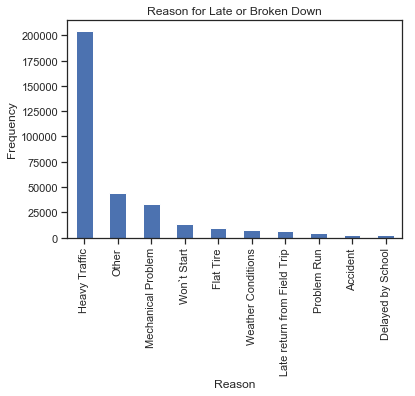

In [82]:
df.Reason.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.xlabel('Reason')
plt.title('Reason for Late or Broken Down')

In [83]:
df_breakdown = df[df['Breakdown_or_Running_Late'] == 'Breakdown']

In [84]:
df_RunningLate = df[df['Breakdown_or_Running_Late'] == 'Running_Late']

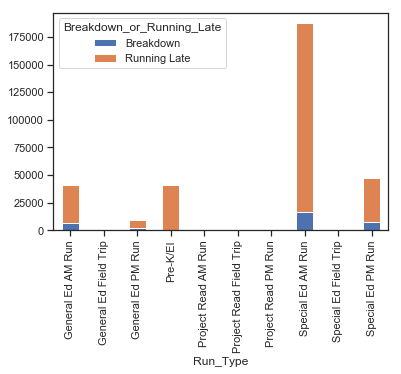

In [85]:
target_runtype = df.groupby(['Run_Type', 'Breakdown_or_Running_Late']).size()
target_runtype.unstack().plot(kind='bar', stacked=True, grid=False)

#show it with time 

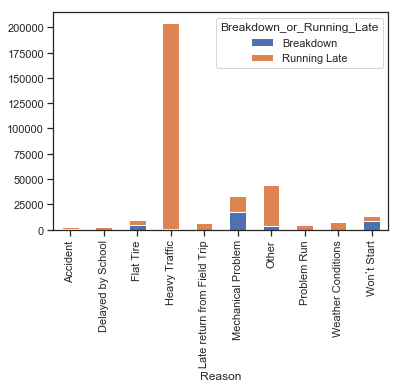

In [86]:
target_runtype = df.groupby(['Reason', 'Breakdown_or_Running_Late']).size()
target_runtype.unstack().plot(kind='bar', stacked=True, grid=False)

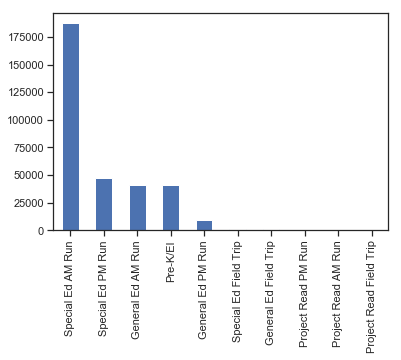

In [87]:
df.Run_Type.value_counts().plot(kind='bar')

In [94]:
len(df['day'].unique())

860

In [98]:
df = df.drop('Busbreakdown_ID',axis=1)

In [101]:
df = df.drop('Occurred_On', axis=1)

In [102]:
df = df.drop('datetime_text', axis=1)

In [105]:
df = df.drop('Bus_Company_Name',axis=1)

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 328235 entries, 0 to 328234
Data columns (total 21 columns):
School_Year                        328235 non-null object
Run_Type                           328232 non-null object
Bus_No                             328225 non-null object
Route_Number                       328228 non-null object
Reason                             328233 non-null object
Schools_Serviced                   328228 non-null object
day                                328235 non-null object
time                               328235 non-null object
hour of issue                      328235 non-null int64
Created_On                         328235 non-null object
Boro                               317077 non-null object
bus company name normalized        328235 non-null object
How_Long_Delayed                   288749 non-null object
Number_Of_Students_On_The_Bus      328235 non-null int64
Has_Contractor_Notified_Schools    328235 non-null object
Has_Contractor_Notifi

In [108]:
df['bus company name normalized'].value_counts().head(5)

#top 5 companies 

LEESEL TRANSP CORP (B2192    51281
RELIANT TRANS, INC.          30967
G.V.C., LTD.                 27313
PIONEER TRANSPORTATION CO    26290
NEW DAWN TRANSIT, LLC (B2    16542
Name: bus company name normalized, dtype: int64

In [111]:
df_breakdown['bus company name normalized'].value_counts().head()

LITTLE RICHIE BUS SERVICE    5944
LOGAN BUS COMPANY INC.       3470
RELIANT TRANS, INC.          3245
LITTLE LISA BUS CO. INC.     2311
LORINDA ENT. LTD.            2066
Name: bus company name normalized, dtype: int64

In [116]:
df_runlate['bus company name normalized'].value_counts().head()

LEESEL TRANSP CORP (B2192    50759
RELIANT TRANS, INC.          27722
G.V.C., LTD.                 26566
PIONEER TRANSPORTATION CO    26270
NEW DAWN TRANSIT, LLC (B2    15593
Name: bus company name normalized, dtype: int64

In [118]:
df = df.dropna()

In [129]:
df['How_Long_Delayed'].str.replace('minutes','')
df['How_Long_Delayed'].str.replace('MINS','')
df['How_Long_Delayed'].str.replace('min','')
df['How_Long_Delayed'].str.replace('minutes','')
df['How_Long_Delayed'].str.replace('mins','')
df['How_Long_Delayed'].str.replace('MINS','')

0         25 minutes
2                 30
3             20 min
4             30 min
7             90 MIN
8                20 
9                 20
10           30 mins
11               15 
12            20 MIN
13           15 mins
15            30 min
16               30 
18                25
19                 0
20                20
22           10 mins
23                20
24            25 min
25           15 mins
26           15 mins
27            20 min
28               1hr
29           20 mins
31            30 min
32                20
33               1hr
34        15 minutes
35            25 MIN
37                45
             ...    
328200     31-45 Min
328202     31-45 Min
328205     61-90 Min
328206     31-45 Min
328208     16-30 Min
328209     16-30 Min
328210     31-45 Min
328211     31-45 Min
328212     31-45 Min
328214     16-30 Min
328215     31-45 Min
328216     16-30 Min
328217     16-30 Min
328218     31-45 Min
328219     16-30 Min
328220     31-45 Min
328221     31